In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')

In [ ]:
df.shape

(6607, 20)

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


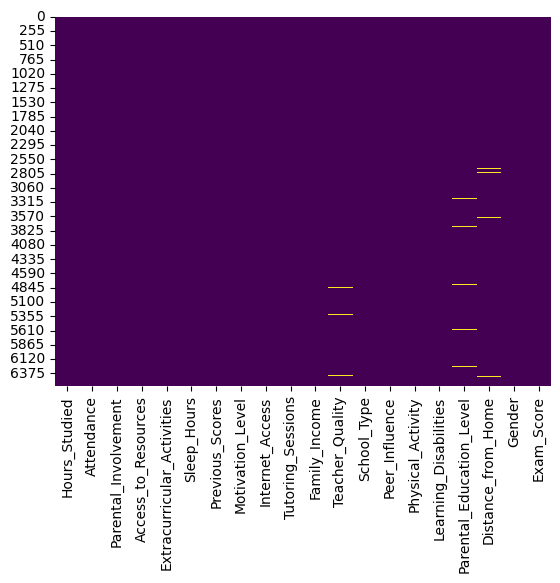

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
categorical_column = df.select_dtypes(include='object').columns

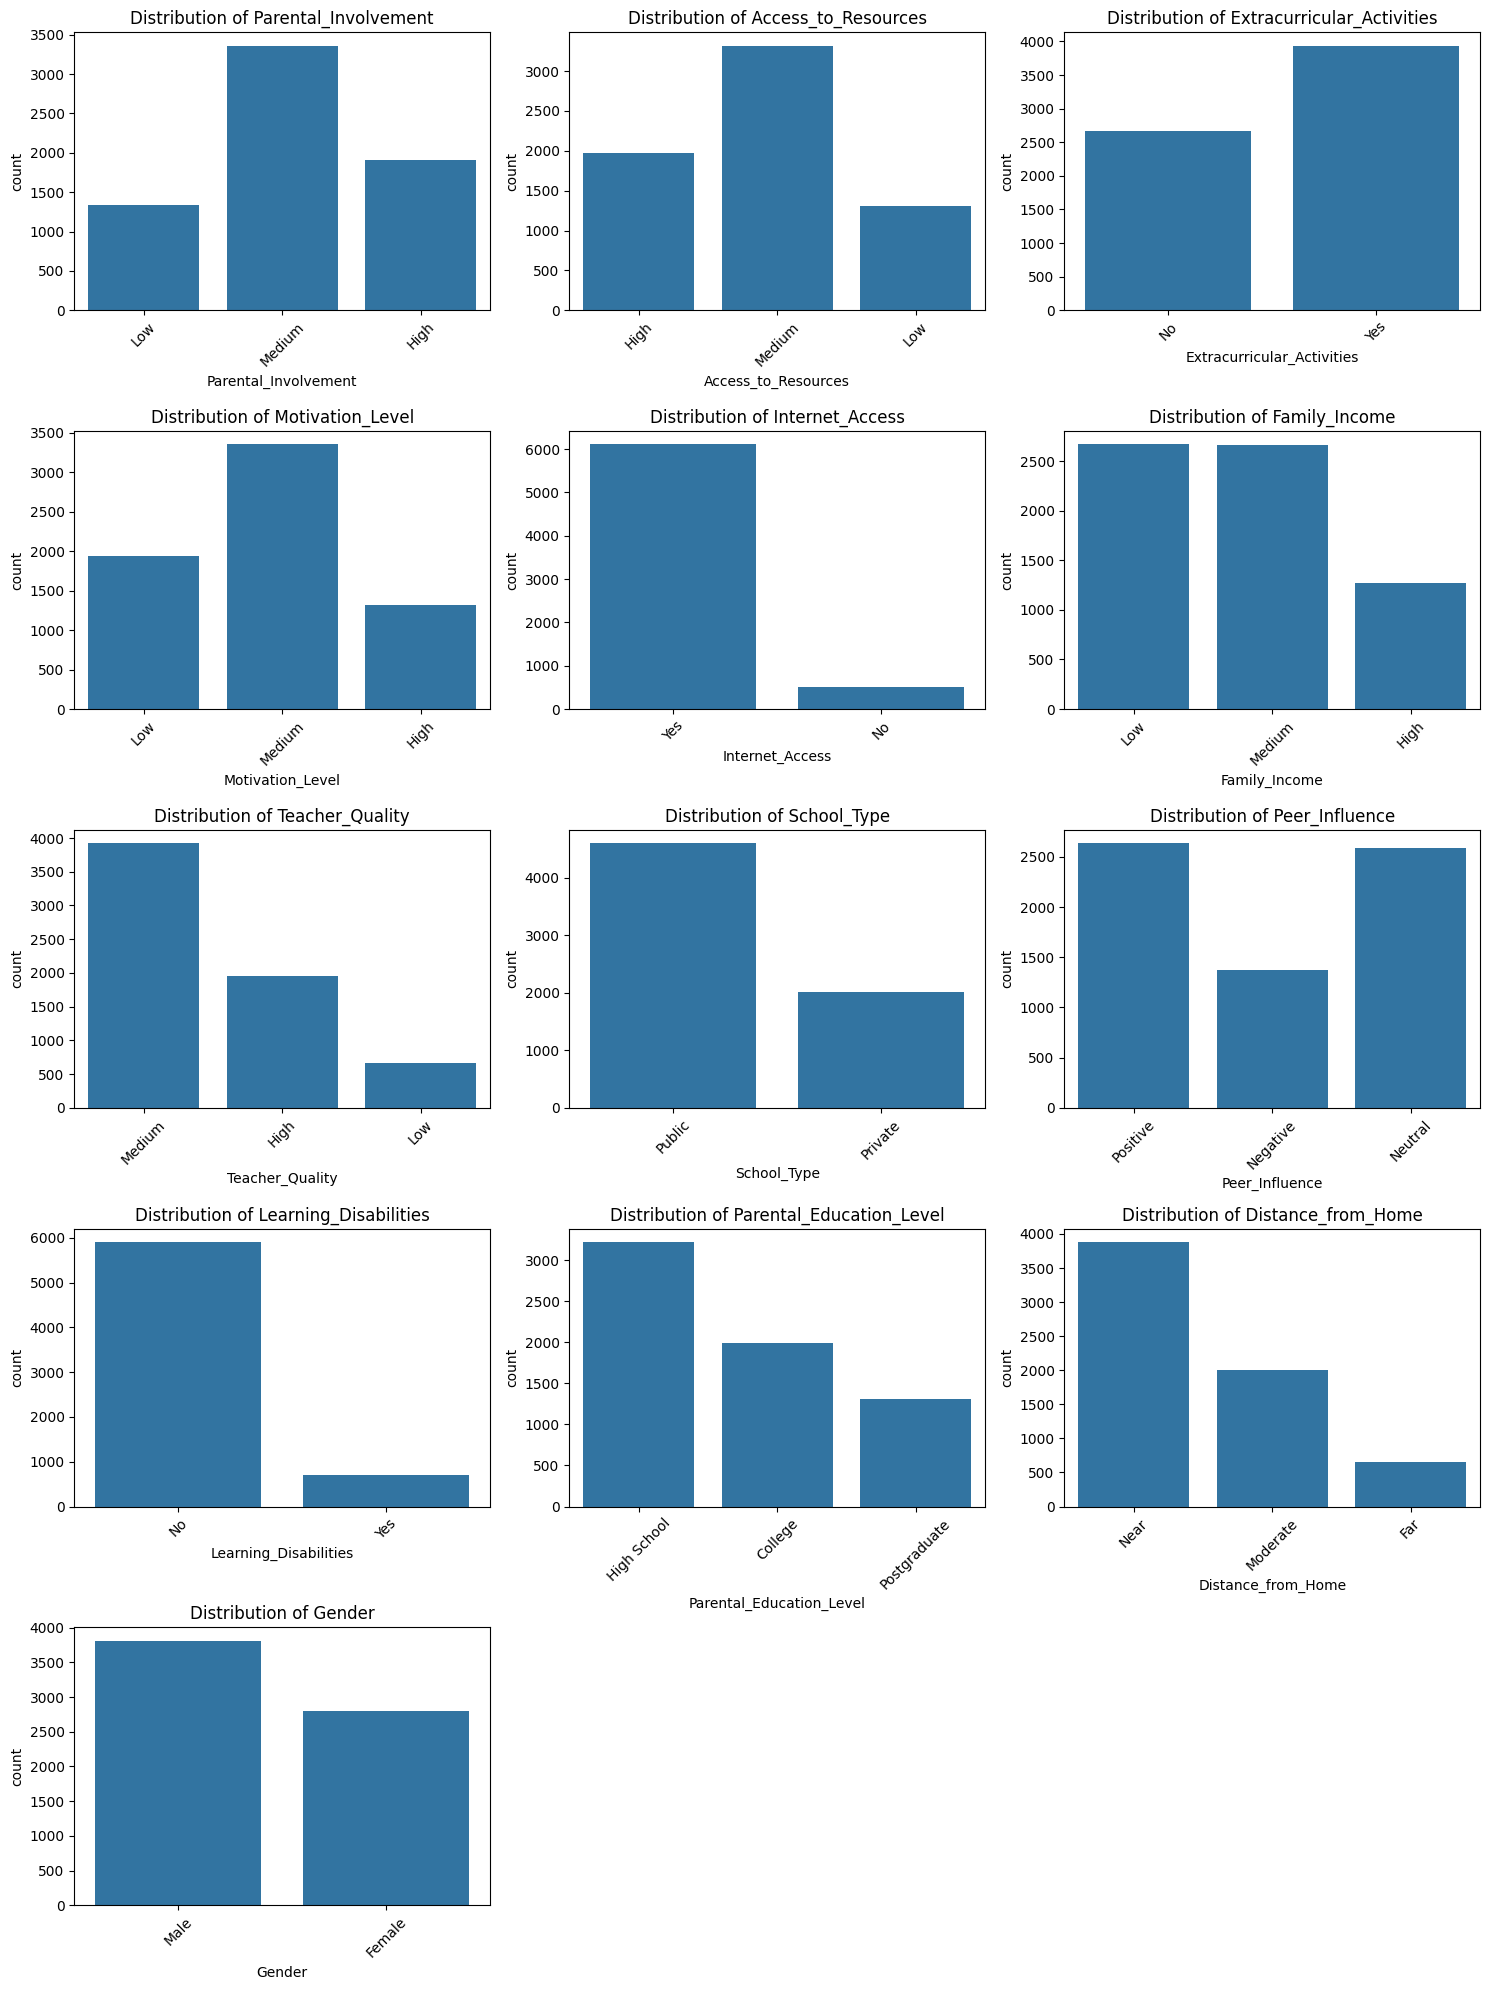

In [ ]:
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_column, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- Parental Involvement: Relatively evenly distributed across Low, Medium, and High; Medium is slightly more prevalent.

- Access to Resources: Majority of students have Medium access, followed by High, then Low.

- Extracurricular Activities: A greater proportion of students participate than do not.

- Motivation Level: Fairly uniform distribution across Low, Medium, and High.

- Internet Access: Most students report having internet access.

- Family Income: Predominantly Low to Medium income; High income is less common.

- Teacher Quality: Most frequently rated as Medium, followed by High and then Low.

- School Type: Public school enrollment significantly exceeds Private.

- Peer Influence: Fairly balanced among Positive, Neutral, and Negative influences.

- Learning Disabilities: Majority of students do not have learning disabilities.

- Parental Education Level: Most parents have a High School education, followed by College, then Postgraduate degrees.

- Distance from School: Most students live near their school, fewer at moderate or far distances.

In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
df['Parental_Involvement'].value_counts()

,count
Parental_Involvement,
Medium,3362
High,1908
Low,1337


In [ ]:
mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
cat_map = ['Parental_Involvement','Access_to_Resources','Motivation_Level','Family_Income','Teacher_Quality']

In [ ]:
df[cat_map] = df[cat_map].apply(lambda x: x.map(mapping))

In [ ]:
map1 = {
    'Yes': 0,
    'No': 1
}

In [ ]:
cat_map1 = ['Extracurricular_Activities','Internet_Access','Learning_Disabilities']

In [ ]:
df[cat_map1] = df[cat_map1].apply(lambda x: x.map(map1))

In [ ]:
school_type_map = {'Public': 0, 'Private': 1}
peer_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
Parental_Education_Level_map = {'High School': 0, 'College': 1, 'Postgraduate':2}
Distance_from_Home_map = {'Near': 0, 'Moderate': 1, 'Far': 2}
gender_map = {'Male': 0, 'Female': 1}

In [ ]:
df['School_Type'] = df['School_Type'].map(school_type_map)
df['Peer_Influence'] = df['Peer_Influence'].map(peer_map)
df['Parental_Education_Level'] = df['Parental_Education_Level'].map(Parental_Education_Level_map)
df['Distance_from_Home'] = df['Distance_from_Home'].map(Distance_from_Home_map)
df['Gender'] = df['Gender'].map(gender_map)

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,1,7,73,0,0,0,0,1.0,0,2,3,1,0.0,0.0,0,67
1,19,64,0,1,1,8,59,0,0,2,1,1.0,0,0,4,1,1.0,1.0,1,61
2,24,98,1,1,0,7,91,1,0,2,1,1.0,0,1,4,1,2.0,0.0,0,74
3,29,89,0,1,0,8,98,1,0,1,1,1.0,0,0,4,1,0.0,1.0,0,71
4,19,92,1,1,0,6,65,1,0,3,1,2.0,0,1,4,1,1.0,0.0,1,70


In [ ]:
df['Teacher_Quality'].value_counts()

,count
Teacher_Quality,
1.0,3925
2.0,1947
0.0,657


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
missing_value = ['Teacher_Quality','Parental_Education_Level','Distance_from_Home']

In [ ]:
for col in missing_value:
    df[missing_value] = df[missing_value].fillna(df[missing_value].mean()).round().astype(int)

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,1,7,73,0,0,0,0,1,0,2,3,1,0,0,0,67
1,19,64,0,1,1,8,59,0,0,2,1,1,0,0,4,1,1,1,1,61
2,24,98,1,1,0,7,91,1,0,2,1,1,0,1,4,1,2,0,0,74
3,29,89,0,1,0,8,98,1,0,1,1,1,0,0,4,1,0,1,0,71
4,19,92,1,1,0,6,65,1,0,3,1,2,0,1,4,1,1,0,1,70


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


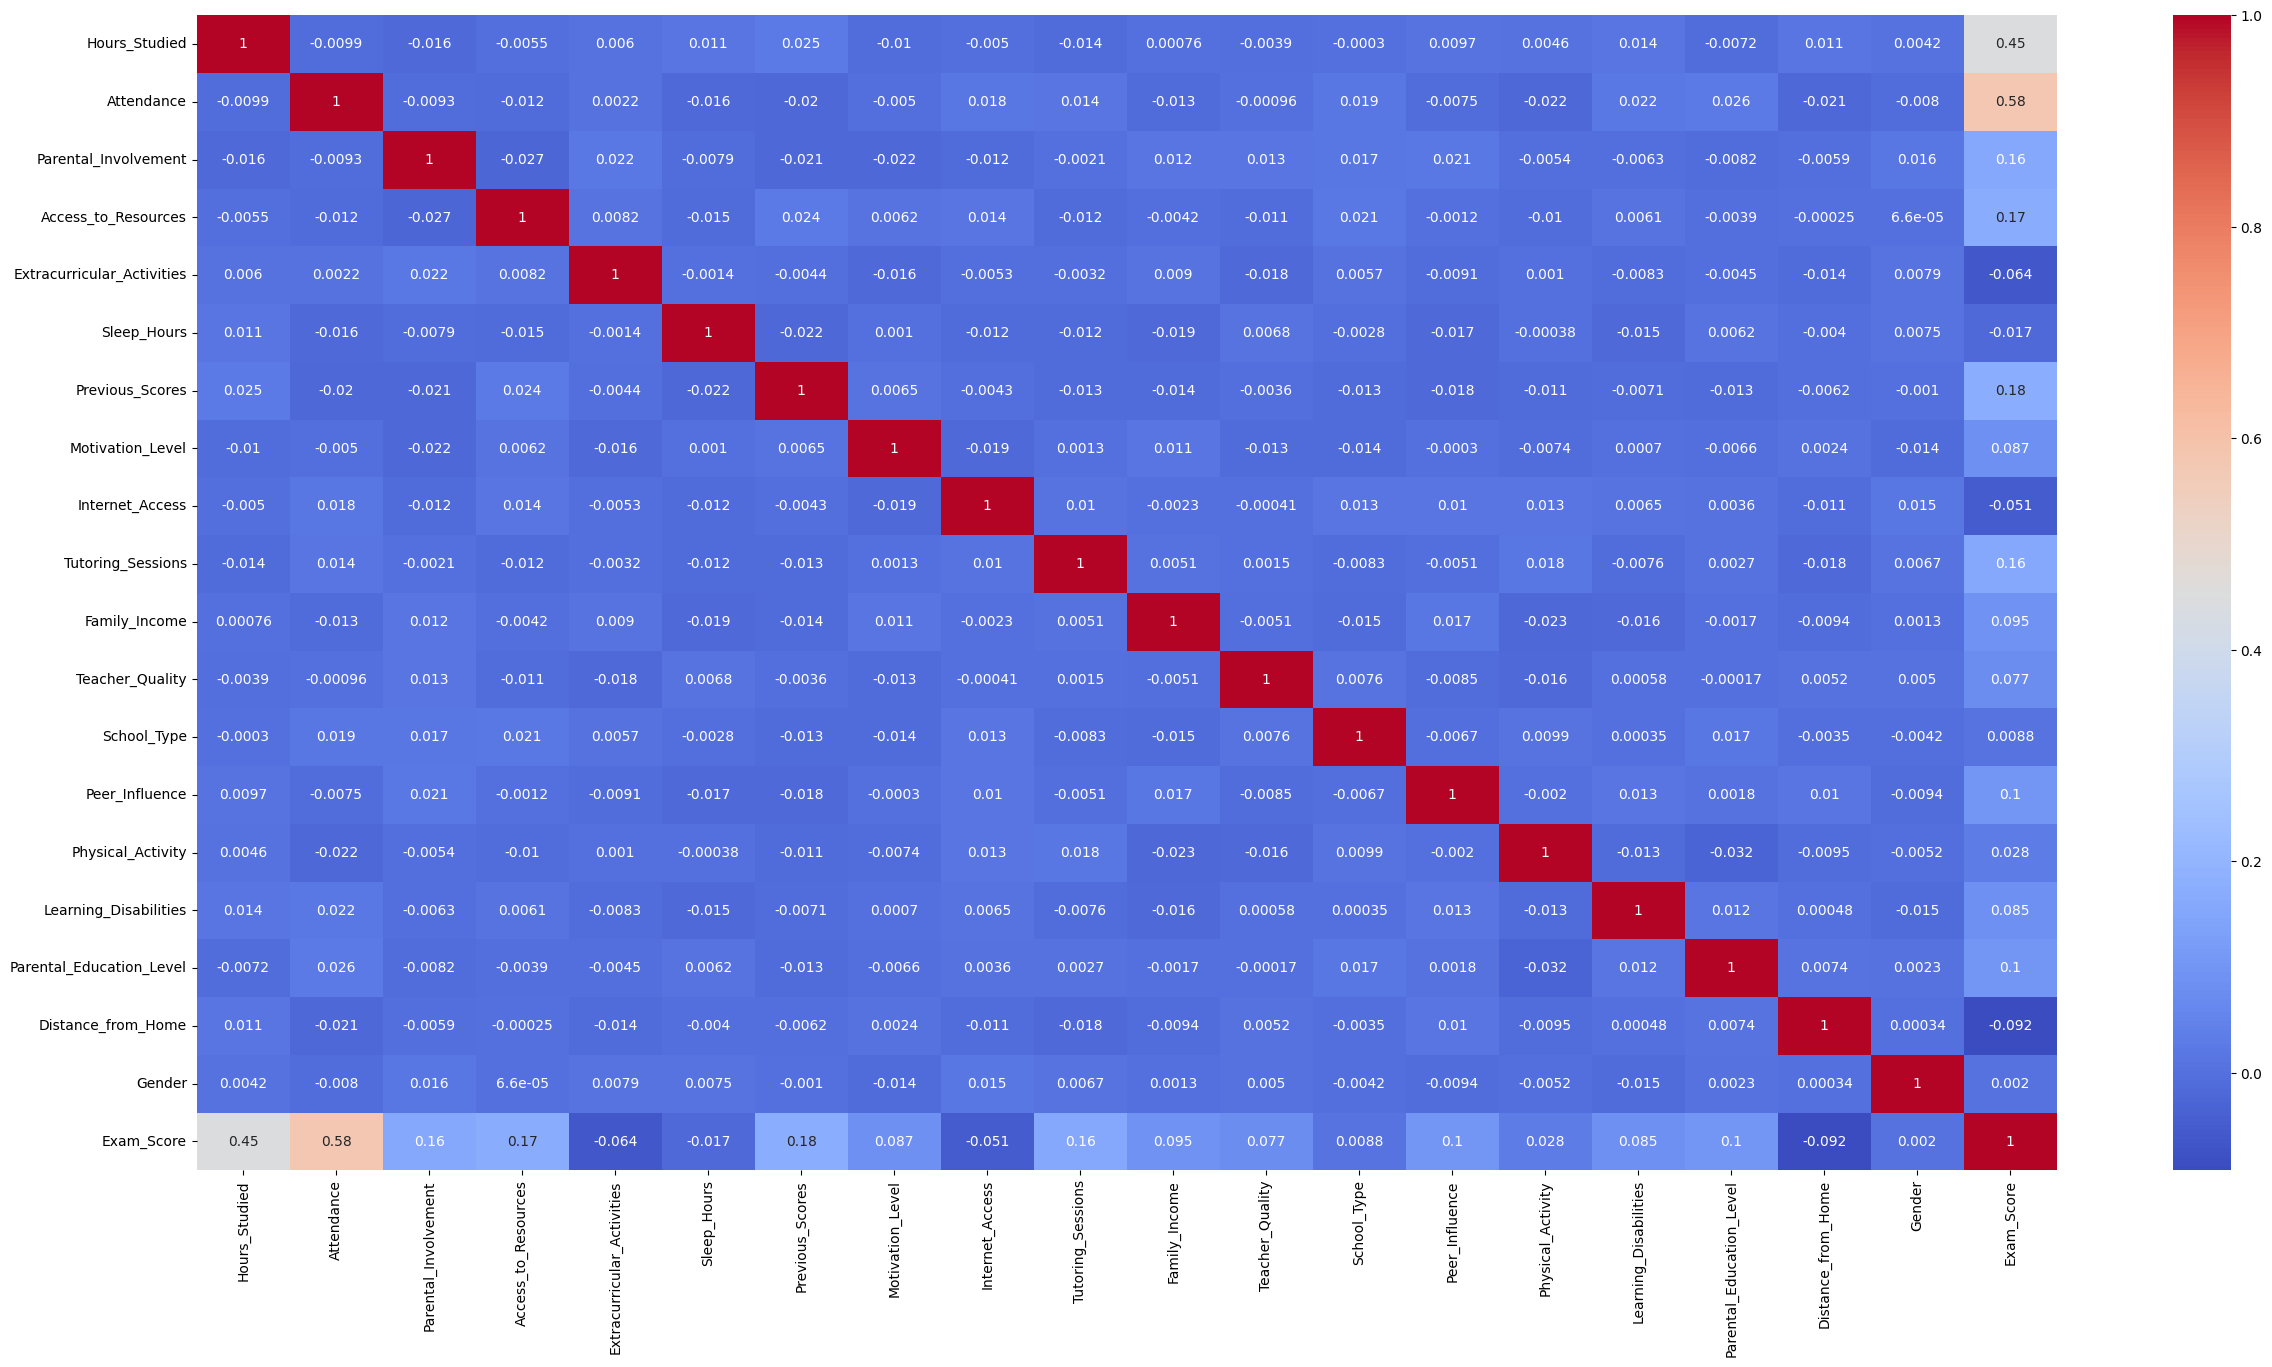

In [ ]:
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

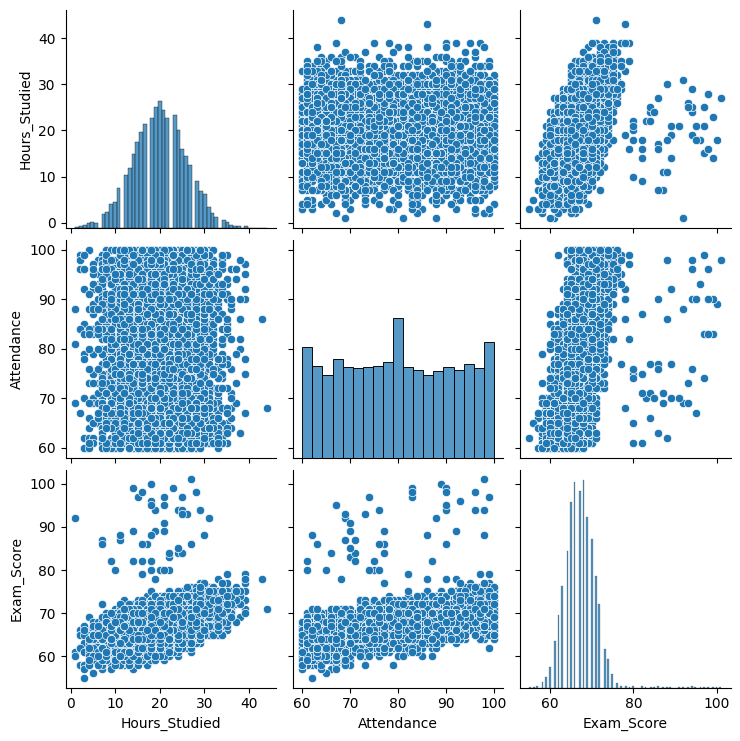

In [ ]:
sns.pairplot(df[['Hours_Studied', 'Attendance', 'Exam_Score']])
plt.show()


1. Hours_Studied vs. Exam_Score:
   Positive correlation observed — as hours studied increase, exam scores tend to increase.

2. Attendance vs. Exam_Score:
   Also positively correlated — higher attendance generally means higher exam scores.

3. Hours_Studied vs. Attendance:
    No strong linear correlation found — hours studied and attendance appear independent.

4. Distributions:
   - Hours_Studied roughly follows a normal distribution.
   - Attendance is somewhat uniformly distributed with some peaks.
   - Exam_Score is skewed towards the higher end.


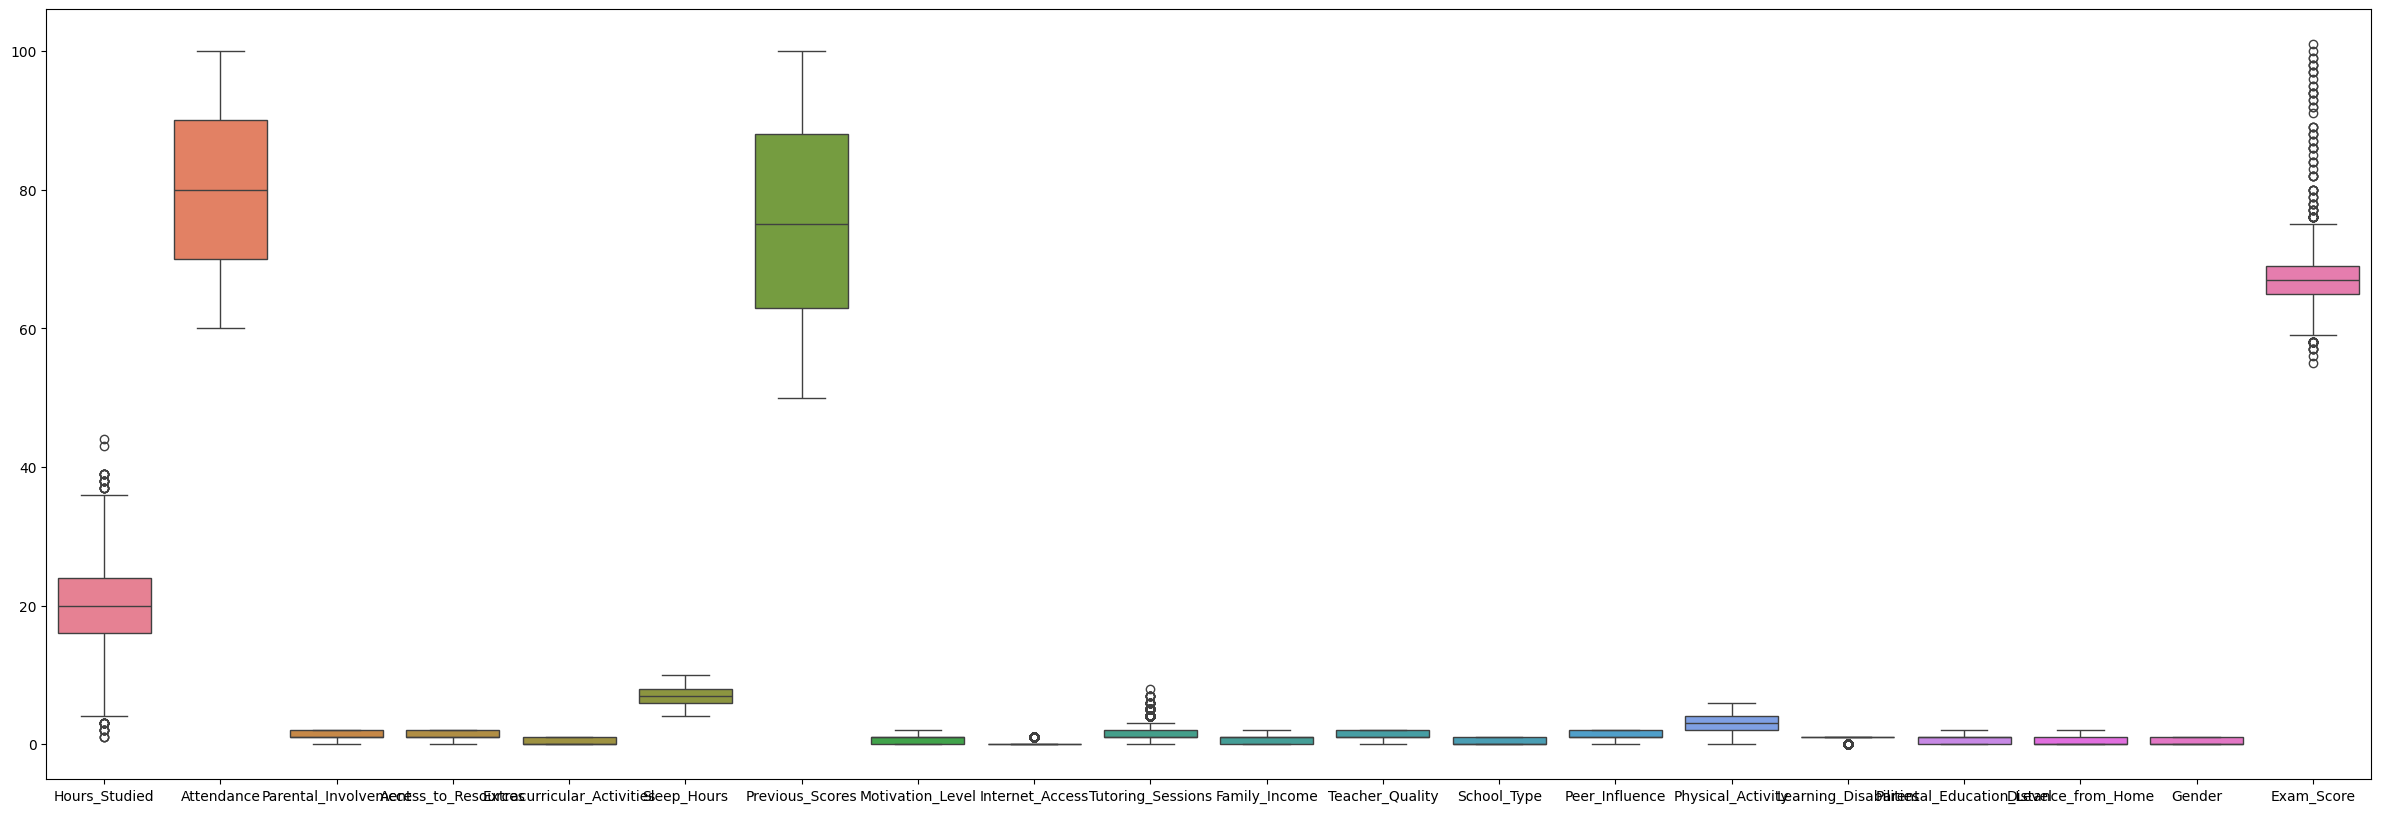

In [ ]:
plt.figure(figsize=(30, 10))
sns.boxplot(df)
plt.show()

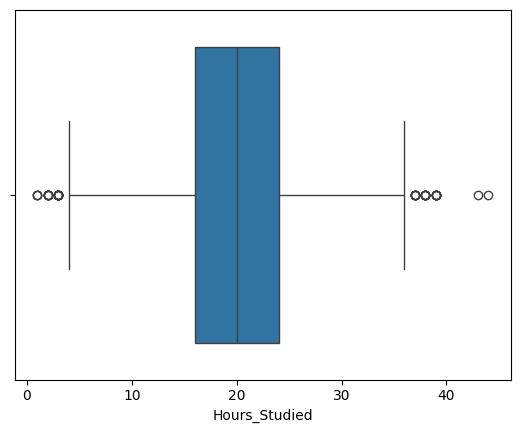

In [ ]:
sns.boxplot(x=df['Hours_Studied'])
plt.show()

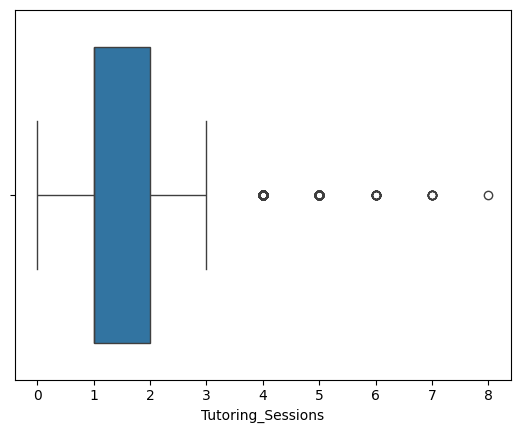

In [ ]:
sns.boxplot(x=df['Tutoring_Sessions'])
plt.show()

Visualization Insights:

Hours_Studied:
- Boxplot shows a fairly symmetric distribution.
- Some potential outliers on the higher end.

Tutoring_Sessions:
- Most students have a low number of tutoring sessions (0-2), with some potential outliers indicating a higher number of sessions.





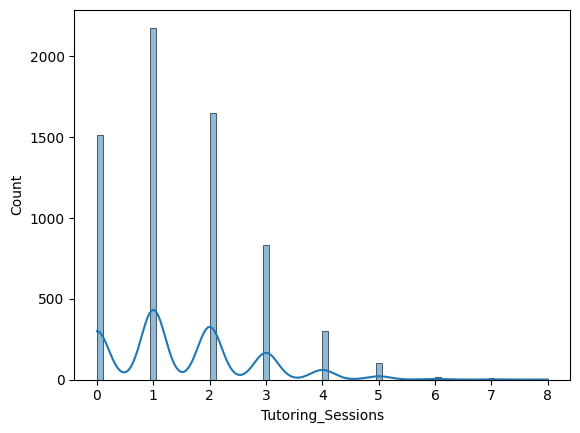

In [ ]:
sns.histplot(df['Tutoring_Sessions'], kde=True)
plt.show()

**Clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
X_behavior_features = ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Motivation_Level', 'Tutoring_Sessions', 'Physical_Activity', 'Internet_Access']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[X_behavior_features])

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

<Axes: >

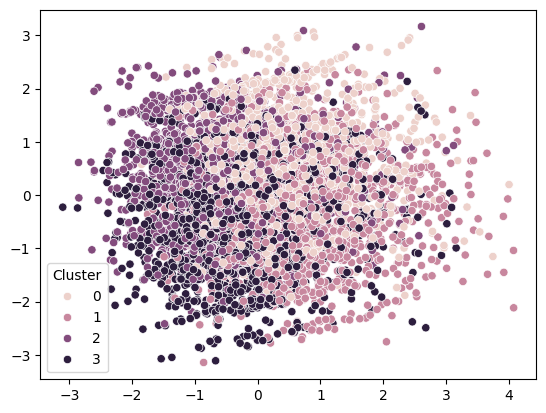

In [ ]:
import seaborn as sns
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'])

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Cluster
0,23,84,0,2,1,7,73,0,0,0,...,1,0,2,3,1,0,0,0,67,0
1,19,64,0,1,1,8,59,0,0,2,...,1,0,0,4,1,1,1,1,61,2
2,24,98,1,1,0,7,91,1,0,2,...,1,0,1,4,1,2,0,0,74,1
3,29,89,0,1,0,8,98,1,0,1,...,1,0,0,4,1,0,1,0,71,1
4,19,92,1,1,0,6,65,1,0,3,...,2,0,1,4,1,1,0,1,70,1


In [ ]:
cluster_info = {
    0: {
        "name": "Struggling & Unmotivated"
        },
    1: {
        "name": "Highly Motivated Achievers"
        },
    2: {
        "name": "Balanced Performers"
        },
    3: {
        "name": "Extracurricular Focused"
        }
}


| Cluster | Characteristics                                                             | Suggested Name                 |
| ------- | --------------------------------------------------------------------------- | ------------------------------ |
| **0**   | Low study hours, insufficient sleep, low motivation                         | **Struggling & Unmotivated**   |
| **1**   | High study hours, strong motivation, frequent tutoring sessions             | **Highly Motivated Achievers** |
| **2**   | Average study time, well-balanced lifestyle (good sleep, moderate activity) | **Balanced Performers**        |
| **3**   | High involvement in extracurricular activities, but low academ              |                                |

In [ ]:
X=df.drop(['Exam_Score'], axis=1)
y = df['Exam_Score']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:

MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)

In [ ]:
print(f"R² Score : {R2:.4f}")
print(f"MAE           : {MAE:.4f}")
print(f"MSE           : {MSE:.4f}")
print(f"RMSE          : {RMSE:.4f}")

R² Score : 0.7711
MAE           : 0.4423
MSE           : 3.2359
RMSE          : 1.7989


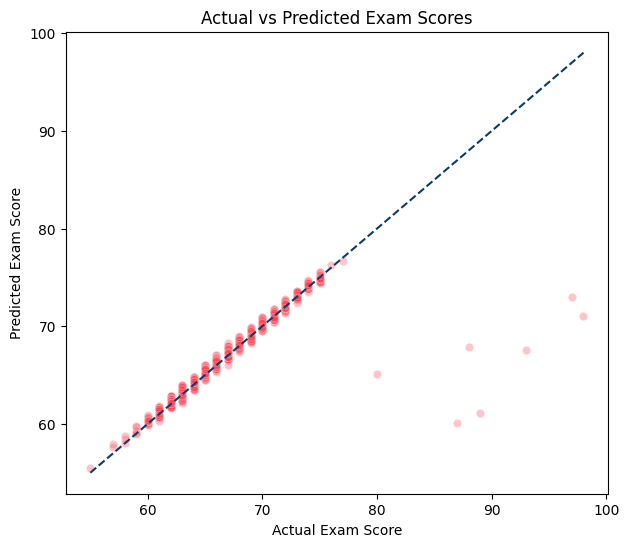

In [ ]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred, color='#ff4252', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#0d3b66', linestyle='--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)


In [ ]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
y_test_pred = model.predict(x_test_poly)

In [ ]:
MAE = mean_absolute_error(y_test, y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_test_pred)

In [ ]:
print(f"R² Score : {R2:.4f}")
print(f"MAE           : {MAE:.4f}")
print(f"MSE           : {MSE:.4f}")
print(f"RMSE          : {RMSE:.4f}")

R² Score : 0.7591
MAE           : 0.5730
MSE           : 3.4057
RMSE          : 1.8454


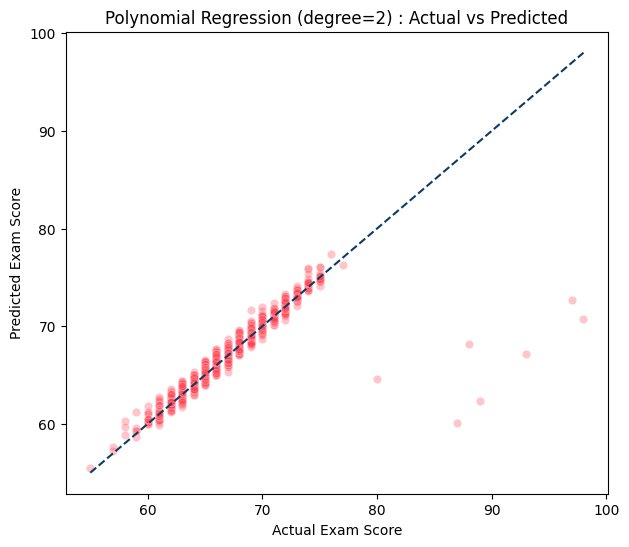

In [ ]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color='#ff4252', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#0d3b66', linestyle='--')  # Ideal line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Polynomial Regression (degree=2) : Actual vs Predicted")
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'gamma': [0, 0.1, 0.3]
}

In [ ]:
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)

In [ ]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 300, 500],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Best R2 Score: 0.70233656167984


In [ ]:
best_model = random_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)

print("Test R²:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print("Test MSE:", MSE)
print("Test RMSE:", RMSE)

Test R²: 0.771069581001205
Test MAE: 0.44226996143074876
Test MSE: 3.2359480638349907
Test RMSE: 1.7988741100574521


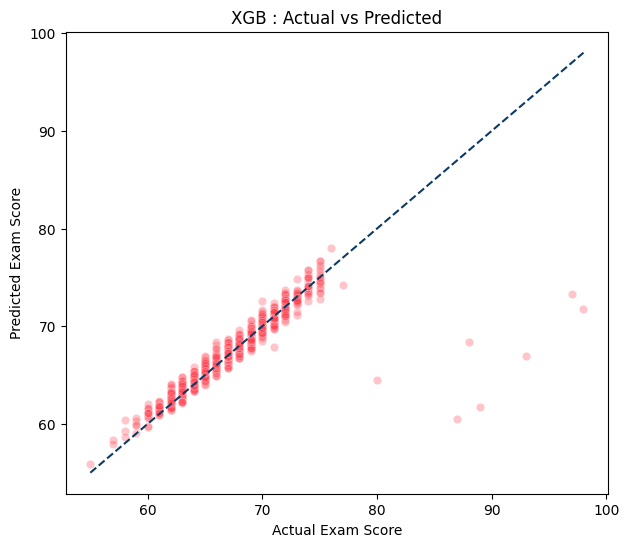

In [ ]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, color='#ff4252', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#0d3b66', linestyle='--')  # Ideal line
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("XGB : Actual vs Predicted")
plt.show()

Personalized Suggestions

In [ ]:
def generate_recommendation(row):
    rec = []

    # Academic Effort
    if row['Hours_Studied'] < 2:
        rec.append("Try to dedicate at least 2–3 hours a day to focused study. Short, regular sessions are better than cramming.")
    if row['Previous_Scores'] < 50:
        rec.append("Focus on foundational topics where you struggled before. Use revision guides or get help from a teacher.")
    # Corrected column name to 'Predicted_Exam_Score'
    if row['Predicted_Exam_Score'] < 50:
        rec.append("Consider a study plan or tutor support to boost exam performance.")
    if row['Tutoring_Sessions'] < 1:
        rec.append("You may benefit from attending tutoring sessions to clarify difficult topics.")

    # Attendance
    if row['Attendance'] < 75:
        rec.append("Try to attend classes regularly to avoid missing important lessons and falling behind.")

    # Health & Well-being
    if row['Sleep_Hours'] < 6:
        rec.append("Getting at least 7–8 hours of sleep helps improve memory, focus, and overall well-being.")
    if row['Physical_Activity'] < 2:
        rec.append("Add some physical activity like walking, yoga, or sports 2–3 times a week to improve energy and reduce stress.")

    # Motivation & Social Environment
    if row['Motivation_Level'] < 5:
        rec.append("Set small, achievable goals each week to build momentum and increase motivation.")
    if row['Peer_Influence'] < 4:
        rec.append("Surround yourself with classmates who encourage and support your academic goals.")

    # Parental & Family Support
    if row['Parental_Involvement'] < 3:
        rec.append("More parental involvement — like reviewing homework or attending school meetings — can positively impact progress.")
    if row['Parental_Education_Level'] < 2:
        rec.append("Parents can support learning through school-provided materials, even without a formal education background.")
    if row['Family_Income'] < 20000:
        rec.append("Explore financial aid or school assistance programs to reduce stress related to resources.")

    # Learning Support
    if row['Learning_Disabilities']:
        rec.append("You may benefit from individualized learning plans or accommodations — speak with a school counselor.")

    # Infrastructure & Access
    if not row['Internet_Access']:
        rec.append("Reliable internet access is essential. Ask your school about free or subsidized internet programs.")
    if row['Access_to_Resources'] < 3:
        rec.append("Make use of school libraries, labs, and online educational platforms for extra learning support.")
    if row['Distance_from_Home'] > 10:
        rec.append("Try to use commuting time for light revision like flashcards or audiobooks if travel is long.")

    # Balance with Extracurriculars
    if row['Extracurricular_Activities'] > 10:
        rec.append("Make sure extracurriculars don't overwhelm study time — balance is key to success.")

    # Quality of Education
    if row['Teacher_Quality'] < 3:
        rec.append("If teaching support is limited, look for trusted online content or peer study groups to reinforce learning.")
    # The School_Type condition needs to handle the integer mapping
    if row['School_Type'] in [0]: # Assuming 0 maps to 'Public' or 'Under-resourced'
        rec.append("Make the most of online tools and free educational apps to supplement school learning.")


    # Default positive message
    if not rec:
        rec.append("You're on the right track! Keep up the consistent effort and continue building good habits.")

    return rec

In [ ]:
input = {
    'Hours_Studied': 8,
    'Attendance': 90,
    'Parental_Involvement': 2,
    'Access_to_Resources': 2,
    'Extracurricular_Activities': 12,
    'Sleep_Hours': 7,
    'Previous_Scores': 87,
    'Motivation_Level': 3,
    'Internet_Access': 1,
    'Tutoring_Sessions': 5,
    'Family_Income': 50000,
    'Teacher_Quality': 2,
    'School_Type': 2,
    'Peer_Influence': 2,
    'Physical_Activity': 2,
    'Learning_Disabilities': 0,
    'Parental_Education_Level': 2,
    'Distance_from_Home': 1,
    'Gender': 1
}

In [ ]:
input_df = pd.DataFrame([input])

In [ ]:
feature_cols = [
    'Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
    'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level',
    'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]


In [ ]:
X_input = input_df[feature_cols]

In [ ]:
predicted_cluster = kmeans.predict(X_input[X_behavior_features])[0]
X_input['Cluster'] = predicted_cluster
predicted_exam_score = best_model.predict(X_input)[0]

In [ ]:
cluster_name = cluster_info.get(predicted_cluster, {}).get("name", "Unknown Cluster")

In [ ]:
print(f"Exam Score: {predicted_exam_score:.2f}")
print(f"Cluster Name: {cluster_name}")

Predicted Exam Score: 70.42
Cluster Name: Struggling & Unmotivated


In [ ]:
input_df.loc[0, 'Predicted_Exam_Score'] = predicted_exam_score

In [ ]:
recommendations = generate_recommendation(input_df.iloc[0])

In [ ]:
print("Personalized Recommendations:")
for rec in recommendations:
    print(f"- {rec}")

Personalized Recommendations:
- Set small, achievable goals each week to build momentum and increase motivation.
- Surround yourself with classmates who encourage and support your academic goals.
- More parental involvement — like reviewing homework or attending school meetings — can positively impact progress.
- Make use of school libraries, labs, and online educational platforms for extra learning support.
- Make sure extracurriculars don't overwhelm study time — balance is key to success.
- If teaching support is limited, look for trusted online content or peer study groups to reinforce learning.


In [ ]:
print(f"Predicted Exam Score: {predicted_exam_score:.2f}")
print(f"Cluster Name: {cluster_name}")
print("Personalized Recommendations:")
for rec in recommendations:
    print(f"- {rec}")

Predicted Exam Score: 70.42
Cluster Name: Struggling & Unmotivated
Personalized Recommendations:
- Set small, achievable goals each week to build momentum and increase motivation.
- Surround yourself with classmates who encourage and support your academic goals.
- More parental involvement — like reviewing homework or attending school meetings — can positively impact progress.
- Make use of school libraries, labs, and online educational platforms for extra learning support.
- Make sure extracurriculars don't overwhelm study time — balance is key to success.
- If teaching support is limited, look for trusted online content or peer study groups to reinforce learning.


In [ ]:
import joblib
joblib.dump(best_model,"student_model.pkl")

['student_model.pkl']

In [ ]:
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']